<a href="https://colab.research.google.com/github/charlespimentel/organ_conhecimento/blob/main/Pantanal_19_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install convertdate

In [ ]:
!pip install bs4

In [ ]:
pip install geopandas

     |████████████████████████████████| 994 kB 36.9 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 
     |████████████████████████████████| 6.6 MB 46.7 MB/s 


In [ ]:
pip install contextily

     |████████████████████████████████| 19.3 MB 41 kB/s 


In [ ]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import datetime

from shapely.geometry import Point

import geopandas as gpd
import contextily
import folium
import matplotlib.pyplot as plt
import seaborn as sns

import os
from urllib.request import urlretrieve
import requests
import zipfile
from bs4 import BeautifulSoup

In [ ]:
sns.set(font_scale=1.4)
sns.set_style({'font.family': 'serif',
               'fontname': 'Times New Roman'})

In [ ]:
df2019 = pd.read_csv('https://raw.githubusercontent.com/charlespimentel/organ_conhecimento/main/Dataset_19_20/Focos_2019-01-01_2019-06-30.csv', sep=',')

In [ ]:
df2020 = pd.read_csv('https://raw.githubusercontent.com/charlespimentel/organ_conhecimento/main/Dataset_19_20/Focos_2020-01-01_2020-06-30.csv', sep=',')

In [ ]:
df2019['datahora'] = pd.to_datetime(df2019['datahora'])
df2020['datahora'] = pd.to_datetime(df2020['datahora'])

In [ ]:
# Coluna 'Data'
df2019['Data'] = df2019['datahora'].dt.strftime('%Y-%m-%d')
df2020['Data'] = df2020['datahora'].dt.strftime('%Y-%m-%d')
# Coluna 'Hora'
df2019['Hora'] = df2019['datahora'].dt.strftime('%H:%M:%S')
df2020['Hora'] = df2020['datahora'].dt.strftime('%H:%M:%S')

In [ ]:
# Remove a coluna 'Data e Hora'
del df2019['datahora']
del df2020['datahora']

In [ ]:
df2019.head(5)

,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,Data,Hora
0,NPP-375,Brasil,MATO GROSSO,POCONE,Pantanal,0,1.0,0.4,-17.72104,-57.17631,3.6,2019-01-25,16:48:00
1,NPP-375,Brasil,MATO GROSSO,POCONE,Pantanal,0,1.1,0.2,-17.72597,-57.17238,4.7,2019-01-25,16:48:00
2,NPP-375,Brasil,MATO GROSSO,POCONE,Pantanal,3,2.3,0.7,-17.56317,-57.22631,7.9,2019-02-02,17:36:00
3,NPP-375,Brasil,MATO GROSSO,POCONE,Pantanal,3,2.4,0.7,-17.56592,-57.19826,46.7,2019-02-02,17:36:00
4,NPP-375,Brasil,MATO GROSSO,POCONE,Pantanal,3,2.4,0.7,-17.56668,-57.20272,3.3,2019-02-02,17:36:00


In [ ]:
df2019.sort_values(by=['Data'],inplace=True)
df2020.sort_values(by=['Data'],inplace=True)

In [ ]:
geometry2019 = [Point(xy) for xy in zip(df2019['longitude'], df2019['latitude'])]
geometry2020 = [Point(xy) for xy in zip(df2020['longitude'], df2020['latitude'])]

In [ ]:
queimadas_pantanal_2019 = gpd.GeoDataFrame(df2019, crs='EPSG:4326', geometry=geometry2019)
queimadas_pantanal_2020 = gpd.GeoDataFrame(df2020, crs='EPSG:4326', geometry=geometry2020)

In [ ]:
queimadas_pantanal_2019.head(5)

,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,Data,Hora,geometry
228,NPP-375,Brasil,MATO GROSSO,POCONE,Pantanal,0,0.0,0.8,-17.71154,-57.20269,4.7,2019-01-02,17:18:00,POINT (-57.20269 -17.71154)
12,NPP-375,Brasil,MATO GROSSO,POCONE,Pantanal,0,0.1,1.0,-16.28449,-56.83383,2.0,2019-01-02,17:18:00,POINT (-56.83383 -16.28449)
11,NPP-375,Brasil,MATO GROSSO,POCONE,Pantanal,0,0.0,0.8,-17.71099,-57.19895,4.7,2019-01-02,17:18:00,POINT (-57.19895 -17.71099)
10,NPP-375,Brasil,MATO GROSSO,POCONE,Pantanal,0,0.0,0.8,-17.70924,-57.21070,6.0,2019-01-02,17:18:00,POINT (-57.21070 -17.70924)
229,NPP-375,Brasil,MATO GROSSO,POCONE,Pantanal,0,0.0,0.8,-17.71208,-57.20643,6.0,2019-01-02,17:18:00,POINT (-57.20643 -17.71208)


In [ ]:
queimadas_pantanal_2019 = queimadas_pantanal_2019.to_crs(crs='EPSG:3857')
queimadas_pantanal_2020 = queimadas_pantanal_2020.to_crs(crs='EPSG:3857')

In [ ]:
queimadas_pantanal_2019.head(5)

,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,Data,Hora,geometry
228,NPP-375,Brasil,MATO GROSSO,POCONE,Pantanal,0,0.0,0.8,-17.71154,-57.20269,4.7,2019-01-02,17:18:00,POINT (-6367774.323 -2003812.253)
12,NPP-375,Brasil,MATO GROSSO,POCONE,Pantanal,0,0.1,1.0,-16.28449,-56.83383,2.0,2019-01-02,17:18:00,POINT (-6326713.015 -1837691.914)
11,NPP-375,Brasil,MATO GROSSO,POCONE,Pantanal,0,0.0,0.8,-17.71099,-57.19895,4.7,2019-01-02,17:18:00,POINT (-6367357.988 -2003747.981)
10,NPP-375,Brasil,MATO GROSSO,POCONE,Pantanal,0,0.0,0.8,-17.70924,-57.21070,6.0,2019-01-02,17:18:00,POINT (-6368665.992 -2003543.480)
229,NPP-375,Brasil,MATO GROSSO,POCONE,Pantanal,0,0.0,0.8,-17.71208,-57.20643,6.0,2019-01-02,17:18:00,POINT (-6368190.658 -2003875.357)


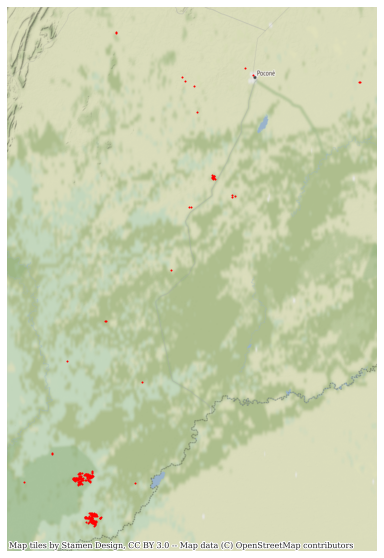

In [ ]:
ax = queimadas_pantanal_2019.plot(figsize=(15, 10), markersize=1, color='red')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

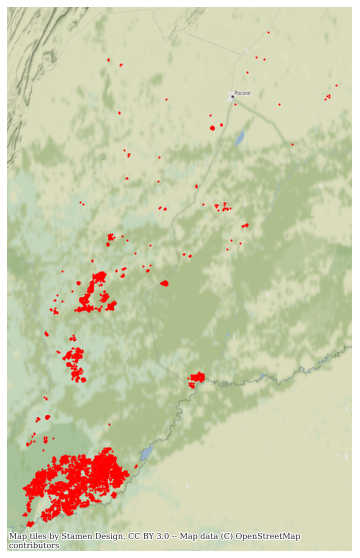

In [ ]:
ax = queimadas_pantanal_2020.plot(figsize=(15, 10), markersize=1, color='red')
contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

In [ ]:
df2019.groupby(['Data']).mean()

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
Data,,,,,,
2019-01-02,0.000000,0.020000,0.840000,-17.425668,-57.130520,4.680000
2019-01-05,0.000000,1.033333,0.700000,-17.711333,-57.201857,8.066667
2019-01-06,2.000000,9.800000,0.100000,-16.107020,-57.102760,2.900000
2019-01-09,0.000000,4.800000,0.300000,-17.711280,-57.208640,7.100000
2019-01-15,2.000000,1.900000,0.200000,-17.724570,-57.189260,15.800000
2019-01-16,0.000000,0.000000,0.300000,-17.726220,-57.189360,1.100000
2019-01-17,2.000000,0.083333,0.655556,-17.721284,-57.188561,13.327778
2019-01-18,2.000000,10.700000,0.033333,-17.724670,-57.180290,1.400000
2019-01-21,1.000000,1.600000,0.375000,-17.722113,-57.190763,1.950000


In [ ]:
df2020.groupby(['Data']).mean()

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
Data,,,,,,
2020-01-01,0.000000,4.966667,0.150000,-17.536412,-57.380035,12.100000
2020-01-04,2.100000,0.000000,0.423333,-17.613604,-57.296697,7.916667
2020-01-05,3.224490,0.000000,0.569388,-17.687326,-57.322163,13.981633
2020-01-06,3.214286,8.550000,-214.011905,-17.671170,-57.318887,8.409524
2020-01-10,0.933333,0.153333,0.066667,-17.218209,-57.037641,6.280000
...,...,...,...,...,...,...
2020-06-17,20.000000,0.000000,1.000000,-16.804170,-56.592810,10.300000
2020-06-18,17.000000,0.000000,0.850000,-16.929595,-57.129085,9.000000
2020-06-23,24.500000,0.000000,1.000000,-16.644115,-56.989470,2.500000


In [ ]:
df2019.shape

(242, 14)

In [ ]:
df2020.shape

(4500, 14)